In [1290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay,r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:/Employee/aug_train.csv')
pd.set_option('display.max_columns',None)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [1291]:
print('The rows are {} and the columns are {}'.format(df.shape[0],df.shape[1]))

The rows are 19158 and the columns are 14


In [1292]:
df.size

268212

In [1293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [1294]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [1295]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [1296]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [1297]:
percent_null=df.isnull().sum()/len(df)
print(round(percent_null,2))

enrollee_id               0.00
city                      0.00
city_development_index    0.00
gender                    0.24
relevent_experience       0.00
enrolled_university       0.02
education_level           0.02
major_discipline          0.15
experience                0.00
company_size              0.31
company_type              0.32
last_new_job              0.02
training_hours            0.00
target                    0.00
dtype: float64


<AxesSubplot:>

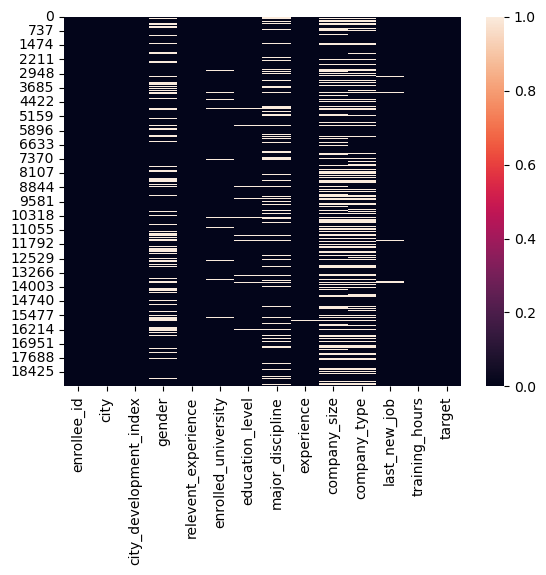

In [1298]:
sns.heatmap(data=df.isna())

In [1299]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])
df['enrolled_university']=df['enrolled_university'].fillna(df['enrolled_university'].mode()[0])
df['education_level']=df['education_level'].fillna(df['education_level'].mode()[0])
df['major_discipline']=df['major_discipline'].fillna(df['major_discipline'].mode()[0])
df['experience']=df['experience'].fillna(df['experience'].mode()[0])
df['company_size']=df['company_size'].fillna(df['company_size'].mode()[0])
df['company_type']=df['company_type'].fillna(df['company_type'].mode()[0])
df['last_new_job']=df['last_new_job'].fillna(df['last_new_job'].mode()[0])

In [1300]:
for features in df.columns:
    print('{} has unique {} values'.format(features,df[features].nunique()))

enrollee_id has unique 19158 values
city has unique 123 values
city_development_index has unique 93 values
gender has unique 3 values
relevent_experience has unique 2 values
enrolled_university has unique 3 values
education_level has unique 5 values
major_discipline has unique 6 values
experience has unique 22 values
company_size has unique 8 values
company_type has unique 6 values
last_new_job has unique 6 values
training_hours has unique 241 values
target has unique 2 values


### EDA Analysis 

<AxesSubplot:>

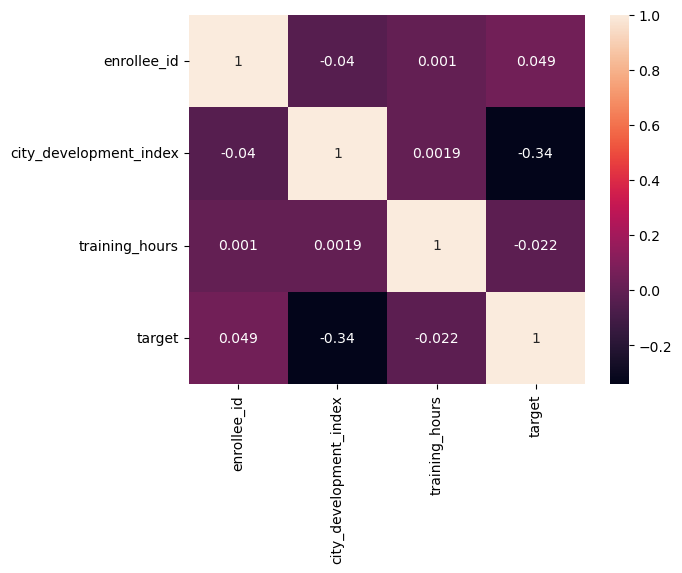

In [1301]:
sns.heatmap(data=df.corr(),annot=True,cmap='rocket')

In [1302]:
missing = pd.DataFrame(df.isnull().sum()/len(df), columns=['Missing'])
cm = sns.light_palette("green", as_cmap=True)
missing.style.background_gradient(cmap=cm)

,Missing
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,0.000000
relevent_experience,0.000000
enrolled_university,0.000000
education_level,0.000000
major_discipline,0.000000
experience,0.000000
company_size,0.000000


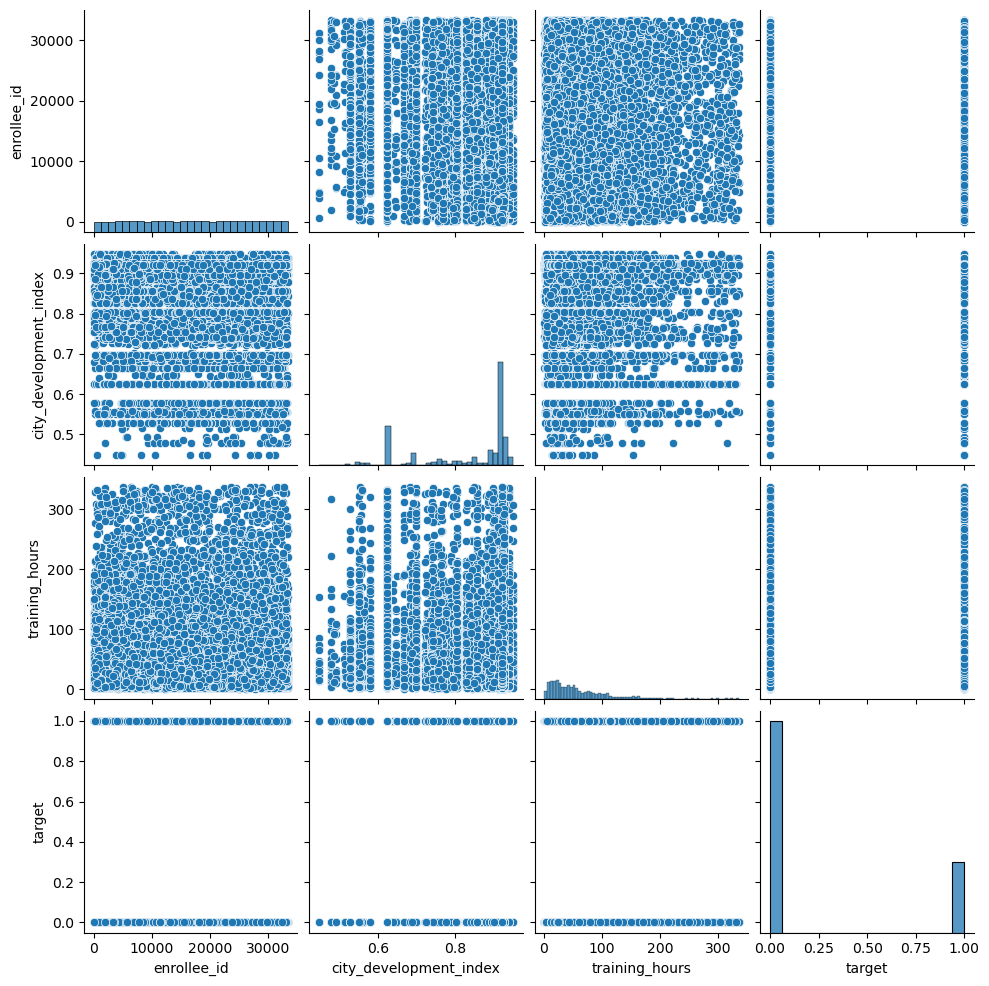

In [1303]:
sns.pairplot(data=df)

In [1304]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


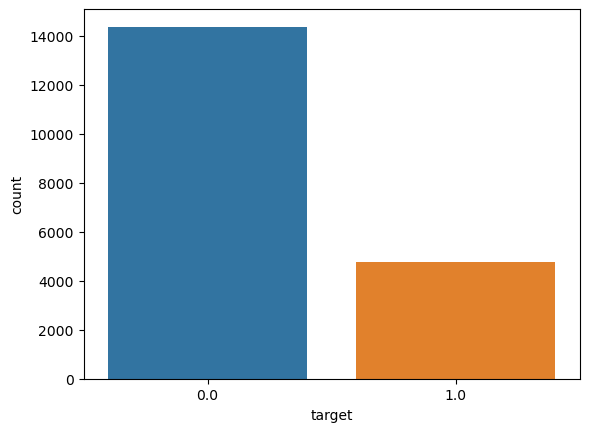

In [1305]:
sns.countplot(data=df, x='target')
plt.show()

<AxesSubplot:xlabel='education_level', ylabel='count'>

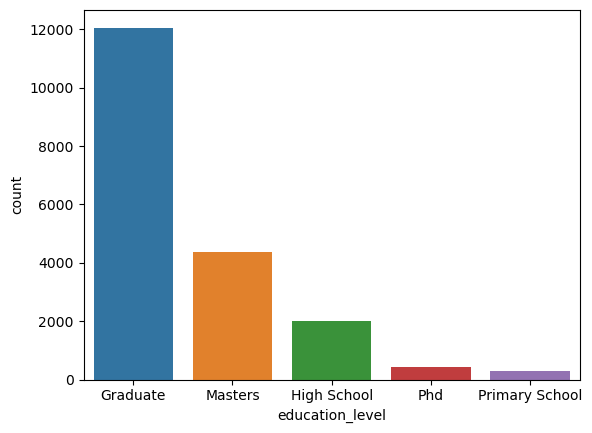

In [1306]:
sns.countplot(df.education_level)

<AxesSubplot:xlabel='city_development_index', ylabel='training_hours'>

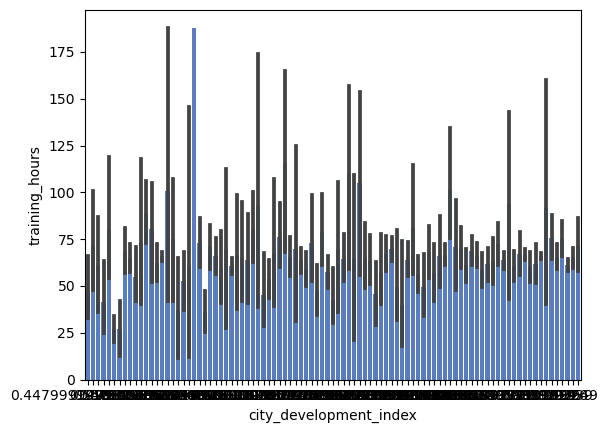

In [1307]:
sns.set_color_codes("muted")
sns.barplot(x="city_development_index", y="training_hours", data=df,label="gender", color="b")

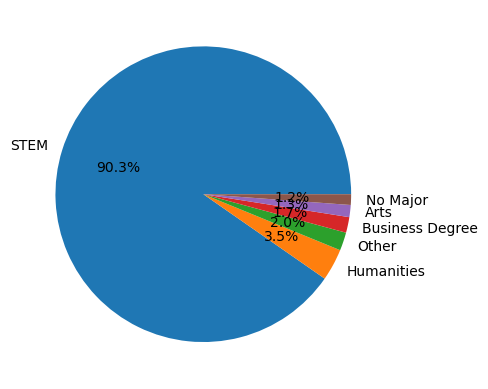

In [1308]:
plt.pie(df['major_discipline'].value_counts(),labels=df['major_discipline'].value_counts().index,autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='education_level', ylabel='Count'>

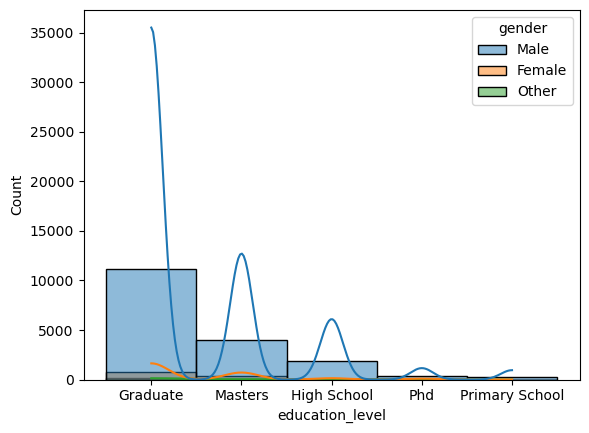

In [1309]:
sns.histplot(df,x='education_level',kde=True,hue='gender')

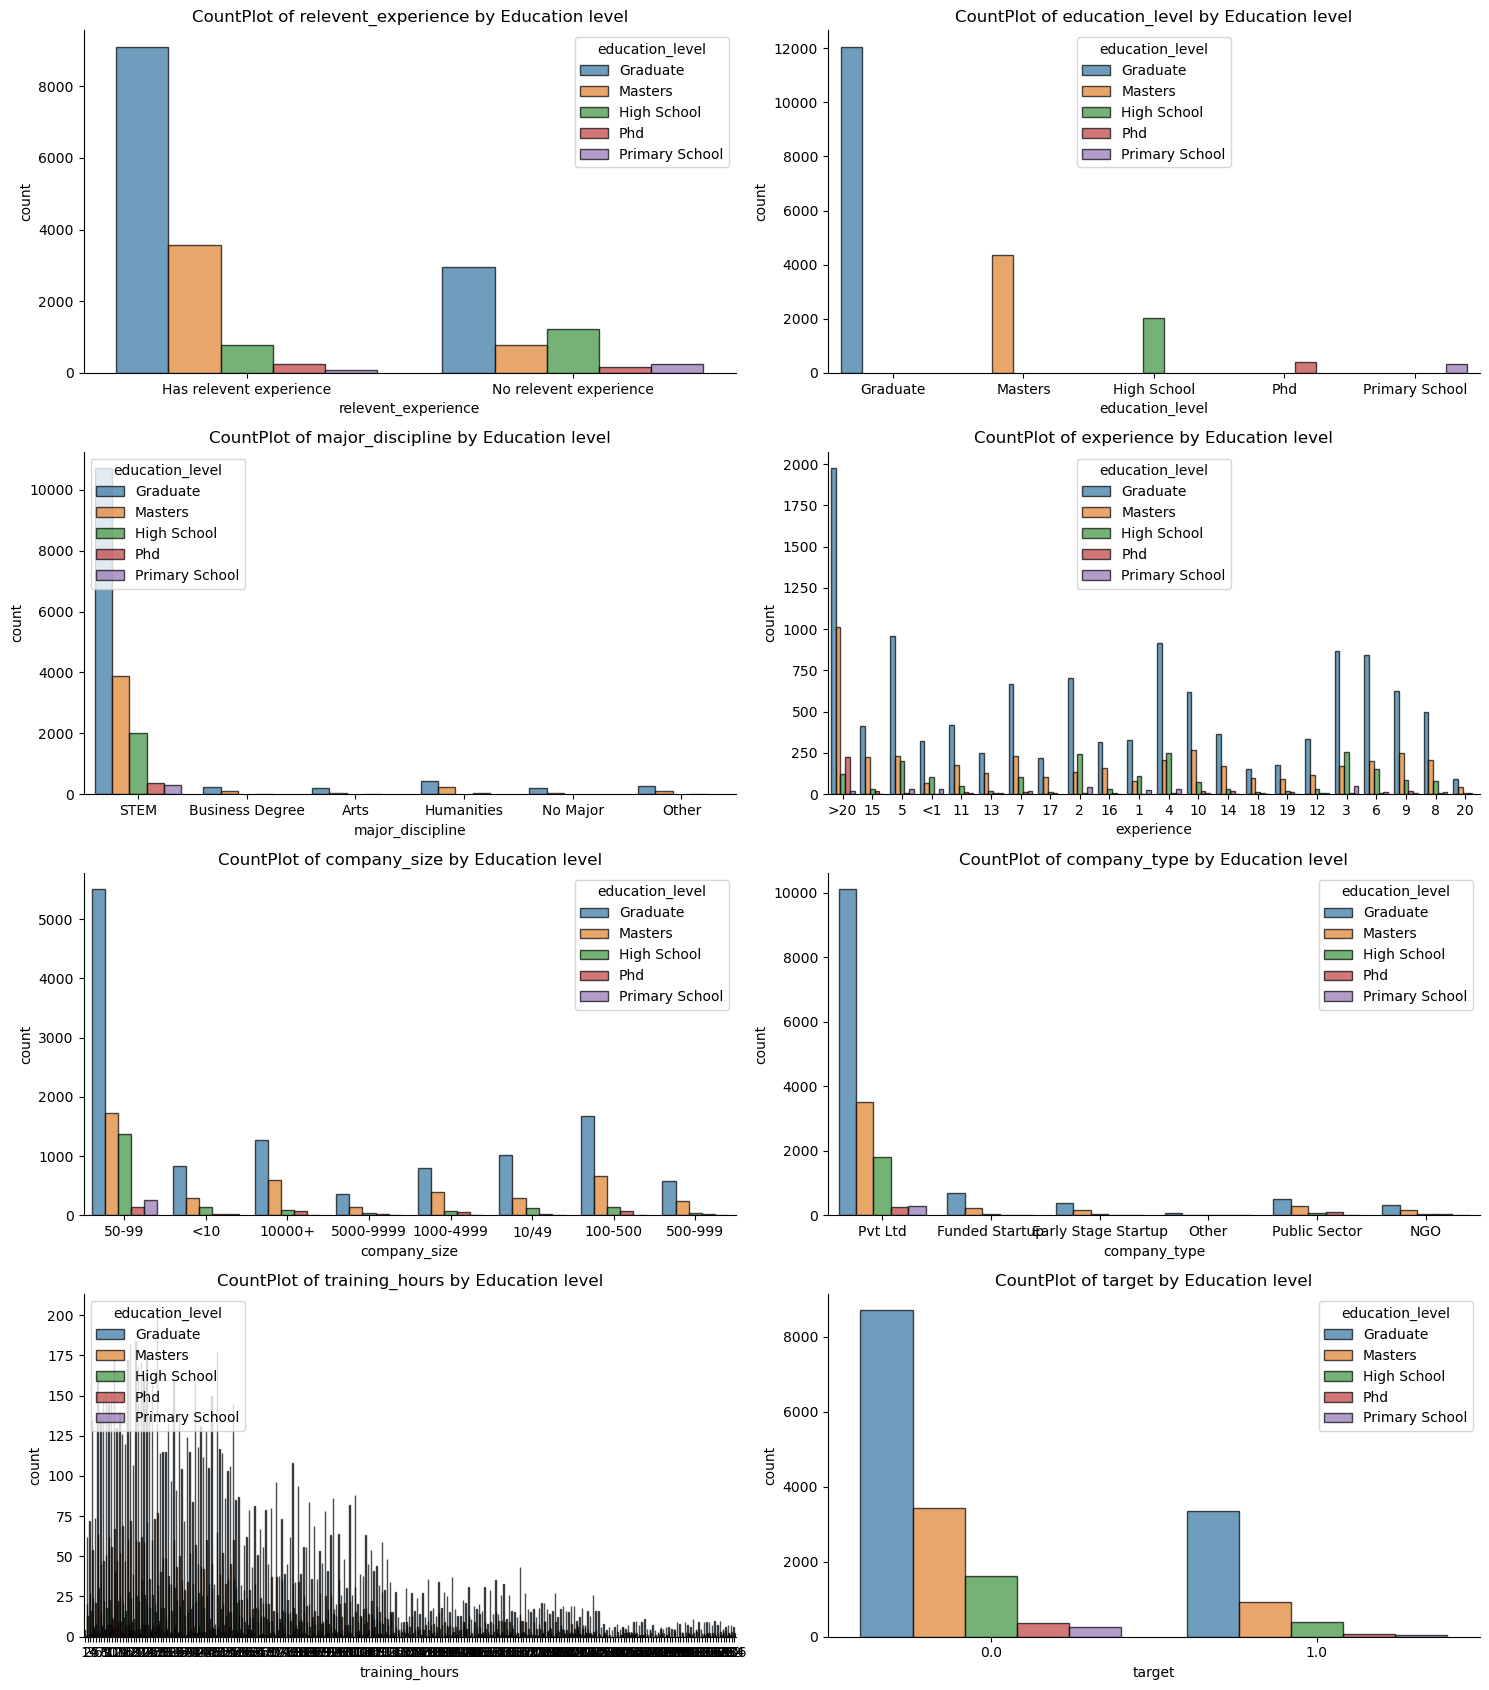

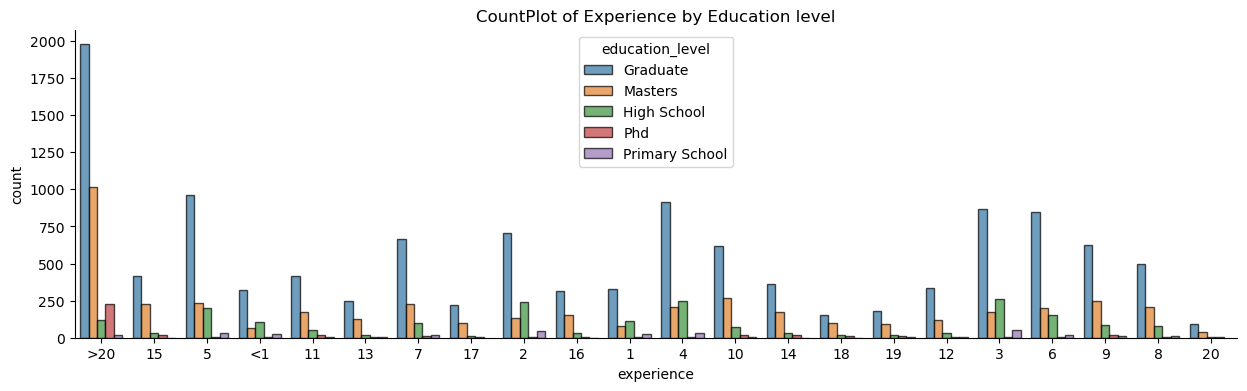

In [1310]:
plt.figure(figsize=[15,17])
fft = ['relevent_experience', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'training_hours', 'target']

n=1

for f in fft:
  plt.subplot(4,2, n)
  sns.countplot(x=f,hue='education_level', edgecolor='black', alpha=0.7, data=df)
  #alpha for transparency
  sns.despine() #Remove spines from the plots
  plt.title(f'CountPlot of {f} by Education level')
  n +=1
plt.tight_layout()
plt.show()

plt.figure(figsize=[15, 4])
sns.countplot(x='experience', hue= 'education_level', edgecolor='black', alpha=0.7, data=df)
sns.despine()
plt.title('CountPlot of Experience by Education level')
plt.show()

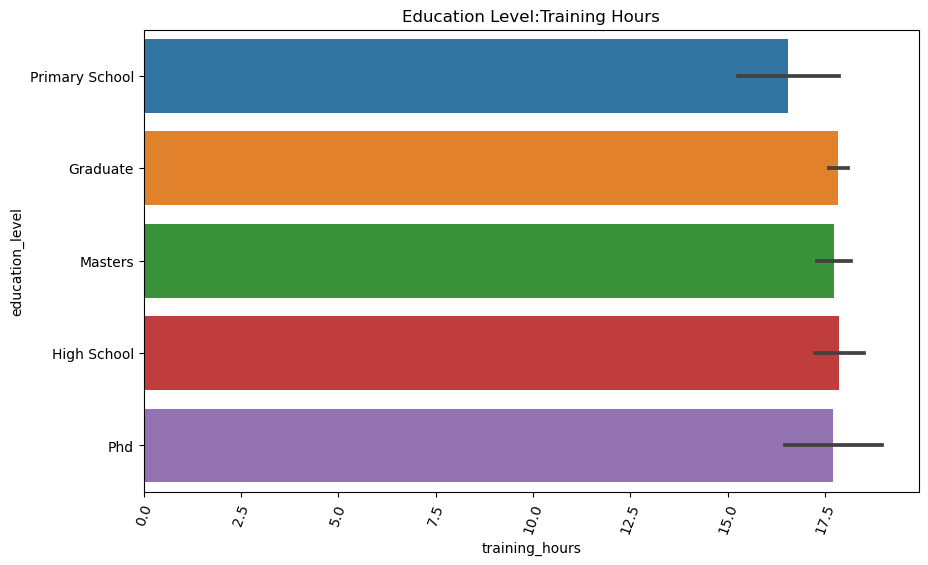

In [1311]:
et=df.sort_values(by='training_hours',ascending=True)[:7000]
figure=plt.figure(figsize=(10,6))
sns.barplot(y=et.education_level,x=et.training_hours)
plt.xticks(rotation=70) # Rotates the X markers (so we can read them)
plt.xlabel('training_hours')
plt.ylabel('education_level')
plt.title('Education Level:Training Hours')
#plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

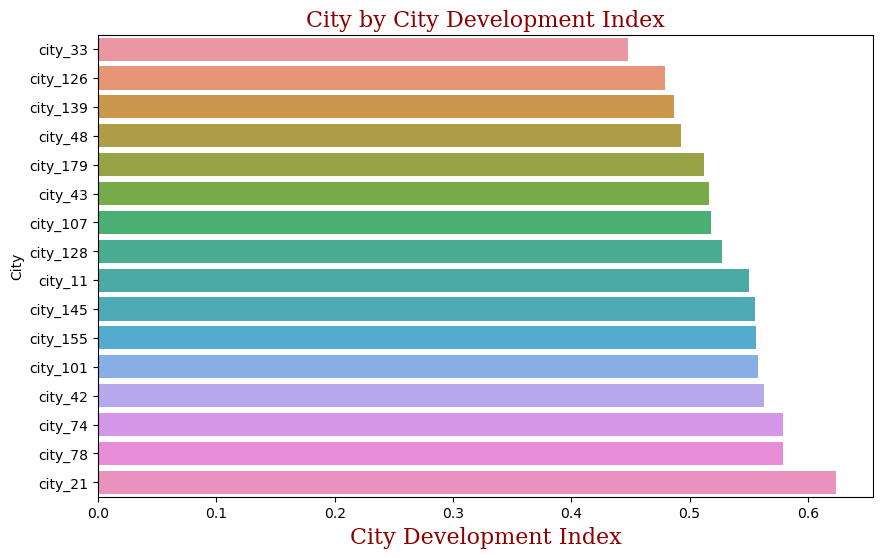

In [1312]:
cdi=df.sort_values(by= 'city_development_index', ascending=True)[:2000]
figure=plt.figure(figsize=(10,6))
sns.barplot(y=cdi.city, x=cdi.city_development_index)
plt.xticks()
font = {'family':'serif','color':'darkred','size':16}
plt.xlabel('City Development Index', fontdict=font)
plt.ylabel('City')
plt.title('City by City Development Index', fontdict=font)
plt.show()

In [1313]:
df.drop(["enrollee_id"],axis=1,inplace=True)
df.drop(['city'],axis=1,inplace=True)

In [1314]:
df['last_new_job']=df['last_new_job'].str.replace('>','')
df['last_new_job']=df['last_new_job'].str.replace('<','')
df['last_new_job']=df['last_new_job'].str.replace('never','0')
df['experience']=df['experience'].str.replace('>','')
df['experience']=df['experience'].str.replace('<','')
df['experience']=df['experience'].str.replace('never','0')
df['experience']=df['experience'].str.replace('>','')
df['company_size']=df['company_size'].str.replace('+','')
df['company_size']=df['company_size'].str.replace('-','')
df['company_size']=df['company_size'].str.replace('<','')
df['company_size']=df['company_size'].str.replace('>','')
df["company_size"] = df["company_size"].apply(lambda x: int(x.split("/")[0]))

In [1315]:
df.sample(5)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
9666,0.939,Male,No relevent experience,no_enrollment,Masters,STEM,4,10004999,Pvt Ltd,2,44,0.0
7067,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,12,100500,Pvt Ltd,4,14,0.0
3027,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,4,10,Funded Startup,2,6,0.0
10121,0.910,Male,No relevent experience,Full time course,Graduate,STEM,1,5099,Pvt Ltd,1,6,1.0
14670,0.910,Male,Has relevent experience,no_enrollment,Masters,STEM,16,10000,Pvt Ltd,2,44,0.0


In [1316]:
dummies=pd.get_dummies(df[['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type']],drop_first=True)
dummies

,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
19154,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
19155,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
19156,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [1317]:
df1=pd.concat([df,dummies],axis=1)
df1

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,5099,Pvt Ltd,1,36,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,5099,Pvt Ltd,4,47,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,5099,Pvt Ltd,0,83,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1,5099,Pvt Ltd,0,52,1.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,5099,Funded Startup,4,8,0.0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,5099,Pvt Ltd,1,42,1.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,5099,Pvt Ltd,4,52,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,5099,Pvt Ltd,4,44,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
19156,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,1,500999,Pvt Ltd,2,97,0.0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [1318]:
df1.shape

(19158, 31)

In [1319]:
df1.drop(['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type'],axis=1,inplace=True)

In [1320]:
df1.sample(5)

,city_development_index,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
9220,0.920,20,10000,2,54,0.0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
13548,0.624,3,500999,1,34,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3425,0.855,20,10,4,78,0.0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0
9695,0.920,20,50009999,4,40,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6162,0.920,3,100500,2,34,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [1321]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   city_development_index                      19158 non-null  float64
 1   experience                                  19158 non-null  object 
 2   company_size                                19158 non-null  int64  
 3   last_new_job                                19158 non-null  object 
 4   training_hours                              19158 non-null  int64  
 5   target                                      19158 non-null  float64
 6   gender_Male                                 19158 non-null  uint8  
 7   gender_Other                                19158 non-null  uint8  
 8   relevent_experience_No relevent experience  19158 non-null  uint8  
 9   enrolled_university_Part time course        19158 non-null  uint8  
 10  enrolled_u

In [1322]:
df1['experience']=df1['experience'].astype(int)
df1['company_size']=df1['company_size'].astype(int)
df1['last_new_job']=df1['last_new_job'].astype(int)

In [1323]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   city_development_index                      19158 non-null  float64
 1   experience                                  19158 non-null  int32  
 2   company_size                                19158 non-null  int32  
 3   last_new_job                                19158 non-null  int32  
 4   training_hours                              19158 non-null  int64  
 5   target                                      19158 non-null  float64
 6   gender_Male                                 19158 non-null  uint8  
 7   gender_Other                                19158 non-null  uint8  
 8   relevent_experience_No relevent experience  19158 non-null  uint8  
 9   enrolled_university_Part time course        19158 non-null  uint8  
 10  enrolled_u

In [1324]:
x=df1.drop(['target'],axis=1)
y=df1['target']

In [1325]:
y_train,y_test=train_test_split(y,test_size=0.20,random_state=42)
print(y.shape,y_train.shape,y_test.shape)

(19158,) (15326,) (3832,)


### Evaluating Test data

In [1326]:
dftest=pd.read_csv('D:/Employee/aug_test.csv')
dftest.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [1327]:
print('Has {} rows and {} columns'.format(dftest.shape[0],dftest.shape[1]))

Has 2129 rows and 13 columns


In [1328]:
dftest.size

27677

In [1329]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [1330]:
dftest.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [1331]:
dftest.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [1332]:
dftest.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [1333]:
dftest['gender']=dftest['gender'].fillna(dftest['gender'].mode()[0])
dftest['enrolled_university']=dftest['enrolled_university'].fillna(dftest['enrolled_university'].mode()[0])
dftest['education_level']=dftest['education_level'].fillna(dftest['education_level'].mode()[0])
dftest['major_discipline']=dftest['major_discipline'].fillna(dftest['major_discipline'].mode()[0])
dftest['experience']=dftest['experience'].fillna(dftest['experience'].mode()[0])
dftest['company_size']=dftest['company_size'].fillna(dftest['company_size'].mode()[0])
dftest['company_type']=dftest['company_type'].fillna(dftest['company_type'].mode()[0])
dftest['last_new_job']=dftest['last_new_job'].fillna(dftest['last_new_job'].mode()[0])

In [1334]:
dftest.isna().sum().any()

False

In [1335]:
dftest.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,<1,50-99,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [1336]:
dftest.drop(['enrollee_id','city'],axis=1,inplace=True)

In [1337]:
dftest.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1,21
1,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,98
2,0.624,Male,No relevent experience,no_enrollment,High School,STEM,<1,50-99,Pvt Ltd,never,15
3,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [1338]:
dftest['company_size'].value_counts()

50-99        960
100-500      318
10000+       217
10/49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

In [1339]:
dftest['experience']=dftest['experience'].str.replace('<','')
dftest['experience']=dftest['experience'].str.replace('>','')
dftest['experience']=dftest['experience'].str.replace('+','')
dftest['experience']=dftest['experience'].str.replace('NaN','0')

dftest['company_size']=dftest['company_size'].str.replace('<','')
dftest['company_size']=dftest['company_size'].str.replace('>','')
dftest['company_size']=dftest['company_size'].str.replace('+','')
dftest['company_size']=dftest['company_size'].str.replace('NaN','0')

dftest['company_size']=dftest['company_size'].str.split('/').str[0]
dftest['last_new_job']=dftest['last_new_job'].str.replace('<','')
dftest['last_new_job']=dftest['last_new_job'].str.replace('>','')
dftest['last_new_job']=dftest['last_new_job'].str.replace('never','0')

In [1340]:
dftest.head(5)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,10,Pvt Ltd,1,21
1,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,98
2,0.624,Male,No relevent experience,no_enrollment,High School,STEM,1,50-99,Pvt Ltd,0,15
3,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10,Pvt Ltd,1,39
4,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10000,Pvt Ltd,4,72


In [1341]:
dftest['company_size']=dftest['company_size'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 if re.match(r'\d+-\d+', x) else x)

In [1342]:
dftest.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,10,Pvt Ltd,1,21
1,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,74.5,Pvt Ltd,1,98
2,0.624,Male,No relevent experience,no_enrollment,High School,STEM,1,74.5,Pvt Ltd,0,15
3,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10,Pvt Ltd,1,39
4,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10000,Pvt Ltd,4,72


In [1343]:
dummies_test=pd.get_dummies(dftest[['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type']],drop_first=True)
dummies_test

,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2125,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2126,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2127,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [1344]:
df2=pd.concat([dftest,dummies_test],axis=1)
df2.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,10,Pvt Ltd,1,21,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,74.5,Pvt Ltd,1,98,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.624,Male,No relevent experience,no_enrollment,High School,STEM,1,74.5,Pvt Ltd,0,15,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10,Pvt Ltd,1,39,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10000,Pvt Ltd,4,72,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [1345]:
df2.shape

(2129, 30)

In [1346]:
df2.size

63870

In [1347]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   city_development_index                      2129 non-null   float64
 1   gender                                      2129 non-null   object 
 2   relevent_experience                         2129 non-null   object 
 3   enrolled_university                         2129 non-null   object 
 4   education_level                             2129 non-null   object 
 5   major_discipline                            2129 non-null   object 
 6   experience                                  2129 non-null   object 
 7   company_size                                2129 non-null   object 
 8   company_type                                2129 non-null   object 
 9   last_new_job                                2129 non-null   object 
 10  training_hou

In [1348]:
df2.drop(['gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job'],axis=1,inplace=True)
df2.head()

,city_development_index,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.827,21,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.920,98,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.624,15,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.827,39,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,0.920,72,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [1349]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   city_development_index                      2129 non-null   float64
 1   training_hours                              2129 non-null   int64  
 2   gender_Male                                 2129 non-null   uint8  
 3   gender_Other                                2129 non-null   uint8  
 4   relevent_experience_No relevent experience  2129 non-null   uint8  
 5   enrolled_university_Part time course        2129 non-null   uint8  
 6   enrolled_university_no_enrollment           2129 non-null   uint8  
 7   education_level_High School                 2129 non-null   uint8  
 8   education_level_Masters                     2129 non-null   uint8  
 9   education_level_Phd                         2129 non-null   uint8  
 10  education_le

In [1350]:
df2.sample(5)

,city_development_index,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
1600,0.666,18,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1202,0.910,182,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
666,0.910,66,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
800,0.910,202,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1901,0.926,334,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [1351]:
df2.isna().sum()

city_development_index                        0
training_hours                                0
gender_Male                                   0
gender_Other                                  0
relevent_experience_No relevent experience    0
enrolled_university_Part time course          0
enrolled_university_no_enrollment             0
education_level_High School                   0
education_level_Masters                       0
education_level_Phd                           0
education_level_Primary School                0
major_discipline_Business Degree              0
major_discipline_Humanities                   0
major_discipline_No Major                     0
major_discipline_Other                        0
major_discipline_STEM                         0
company_type_Funded Startup                   0
company_type_NGO                              0
company_type_Other                            0
company_type_Public Sector                    0
company_type_Pvt Ltd                    

### Comparing Train and Test Data 

In [1352]:
y_test

16144    0.0
13661    0.0
344      0.0
1034     0.0
8109     0.0
        ... 
13955    0.0
13463    0.0
18772    0.0
12809    0.0
1593     0.0
Name: target, Length: 3832, dtype: float64

In [1353]:
df_final=df2.join(y_test,how='inner')
df_final

,city_development_index,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,target
0,0.827,21,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0
3,0.827,39,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1.0
6,0.624,11,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0
17,0.827,31,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.0
19,0.624,110,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,0.910,78,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0
2112,0.698,36,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0
2117,0.725,160,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
2119,0.698,55,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0


In [1354]:
df_final.dtypes

city_development_index                        float64
training_hours                                  int64
gender_Male                                     uint8
gender_Other                                    uint8
relevent_experience_No relevent experience      uint8
enrolled_university_Part time course            uint8
enrolled_university_no_enrollment               uint8
education_level_High School                     uint8
education_level_Masters                         uint8
education_level_Phd                             uint8
education_level_Primary School                  uint8
major_discipline_Business Degree                uint8
major_discipline_Humanities                     uint8
major_discipline_No Major                       uint8
major_discipline_Other                          uint8
major_discipline_STEM                           uint8
company_type_Funded Startup                     uint8
company_type_NGO                                uint8
company_type_Other          

In [1355]:
df_final['target']=df_final['target'].astype(int)

In [1356]:
df_final.dtypes

city_development_index                        float64
training_hours                                  int64
gender_Male                                     uint8
gender_Other                                    uint8
relevent_experience_No relevent experience      uint8
enrolled_university_Part time course            uint8
enrolled_university_no_enrollment               uint8
education_level_High School                     uint8
education_level_Masters                         uint8
education_level_Phd                             uint8
education_level_Primary School                  uint8
major_discipline_Business Degree                uint8
major_discipline_Humanities                     uint8
major_discipline_No Major                       uint8
major_discipline_Other                          uint8
major_discipline_STEM                           uint8
company_type_Funded Startup                     uint8
company_type_NGO                                uint8
company_type_Other          

In [1357]:
df_final

,city_development_index,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,target
0,0.827,21,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3,0.827,39,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1
6,0.624,11,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
17,0.827,31,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
19,0.624,110,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,0.910,78,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2112,0.698,36,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2117,0.725,160,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2119,0.698,55,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [1358]:
x1=df_final.iloc[:,:-1].values
y1=df_final.iloc[:,-1].values
x1

array([[  0.827,  21.   ,   1.   , ...,   0.   ,   0.   ,   1.   ],
       [  0.827,  39.   ,   1.   , ...,   0.   ,   0.   ,   1.   ],
       [  0.624,  11.   ,   1.   , ...,   0.   ,   0.   ,   1.   ],
       ...,
       [  0.725, 160.   ,   1.   , ...,   0.   ,   0.   ,   0.   ],
       [  0.698,  55.   ,   1.   , ...,   0.   ,   0.   ,   1.   ],
       [  0.804,  84.   ,   1.   , ...,   0.   ,   1.   ,   0.   ]])

In [1359]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=42)
x_train

array([[  0.698,  21.   ,   1.   , ...,   0.   ,   0.   ,   1.   ],
       [  0.698, 160.   ,   1.   , ...,   0.   ,   0.   ,   1.   ],
       [  0.624,  28.   ,   1.   , ...,   0.   ,   0.   ,   1.   ],
       ...,
       [  0.92 , 108.   ,   1.   , ...,   0.   ,   0.   ,   1.   ],
       [  0.92 ,  76.   ,   1.   , ...,   0.   ,   0.   ,   1.   ],
       [  0.92 , 266.   ,   1.   , ...,   0.   ,   0.   ,   1.   ]])

In [1360]:
y_train

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [1361]:
scaler=StandardScaler()
scaler.fit_transform(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[-1.67985501, -0.80488906,  0.35657785, ..., -0.05530013,
        -0.2409658 ,  0.44884875],
       [-1.67985501, -0.80488906,  0.35657785, ..., -0.05530013,
        -0.2409658 ,  0.44884875],
       [ 0.67558786,  0.03447455,  0.35657785, ..., -0.05530013,
         4.14996653, -2.22792198],
       ...,
       [ 0.757946  , -0.67819266,  0.35657785, ..., -0.05530013,
        -0.2409658 ,  0.44884875],
       [ 0.757946  ,  0.24035619,  0.35657785, ..., -0.05530013,
         4.14996653, -2.22792198],
       [ 0.7002953 , -0.66235562,  0.35657785, ..., -0.05530013,
        -0.2409658 ,  0.44884875]])

In [1362]:
models=[KNeighborsClassifier(n_neighbors=11),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)*100
    mae=mean_absolute_error(y_test,y_pred)
    mape=mean_absolute_percentage_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    print("{}:: \nAccuracy score:{} \nMAE:{} \nMAPE: {} \nRMSE: {} \nR2: {}\n".format(model,score,mae,mape,rmse,r2),end='\n\n')

KNeighborsClassifier(n_neighbors=11):: 
Accuracy score:70.73170731707317 
MAE:0.2926829268292683 
MAPE: 54921946675250.234 
RMSE: 0.5410017808004594 
R2: -0.45025792188651415


GaussianNB():: 
Accuracy score:30.48780487804878 
MAE:0.6951219512195121 
MAPE: 3130550960489247.0 
RMSE: 0.8337397382993761 
R2: -2.444362564480471


SVC():: 
Accuracy score:71.95121951219512 
MAE:0.2804878048780488 
MAPE: 0.2804878048780488 
RMSE: 0.5296109939172796 
R2: -0.3898305084745761


DecisionTreeClassifier():: 
Accuracy score:68.29268292682927 
MAE:0.3170731707317073 
MAPE: 439375573401999.8 
RMSE: 0.563092506371473 
R2: -0.5711127487103904


RandomForestClassifier():: 
Accuracy score:71.95121951219512 
MAE:0.2804878048780488 
MAPE: 109843893350500.14 
RMSE: 0.5296109939172796 
R2: -0.3898305084745761




              precision    recall  f1-score   support

           0       0.71      0.75      0.73        59
           1       0.25      0.22      0.23        23

    accuracy                           0.60        82
   macro avg       0.48      0.48      0.48        82
weighted avg       0.58      0.60      0.59        82



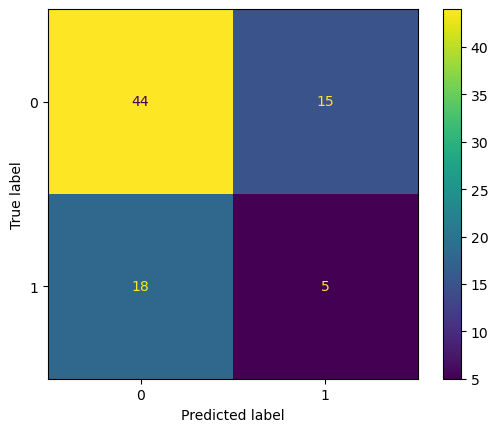

In [1363]:
# SVM
model3=model[2]
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
report3=classification_report(y_test,y_pred3)
cmd3=ConfusionMatrixDisplay.from_predictions(y_test,y_pred3)
print(report3)
cmd3

In [1364]:
dfpd=pd.DataFrame({'Actual value':y_test,'Predictied value':y_pred3})
dfpd

,Actual value,Predictied value
0,0,0
1,0,0
2,0,1
3,0,1
4,1,0
...,...,...
77,0,0
78,0,1
79,0,0
80,1,0


Text(0.5, 1.0, 'Actual vs predicted price')

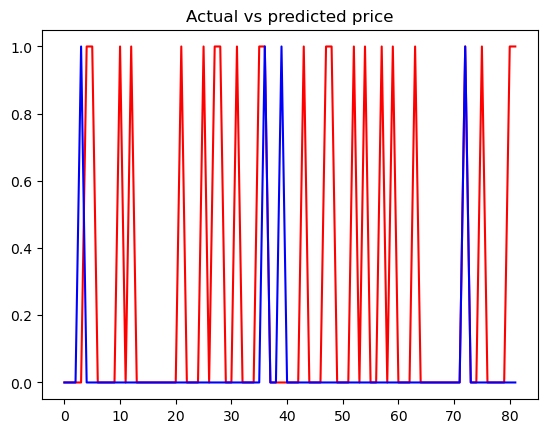

In [1365]:
plt.plot(y_test,color='red',label='Actual values')
plt.plot(y_pred,color='blue',label='Predicted values')
plt.title('Actual vs predicted price')